# 在小型数据集上从头开始训练一个神经网络
- 这里展示的是kaggle上面的dog vs cat项目，从中间抽取一部分数据来训练一个神经网络
- 这里只展示最基本的网络构建过程

In [1]:
# 准备数据集，将原来比较大的数据集进行抽样，形成一个比较小的数据集
import os, shutil
original_dataset_dir = '../../data/cats_and_dogs/train'
base_dir = '../../data/cats_and_dogs_small'
os.mkdir(base_dir)
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')
os.mkdir(train_dir)
os.mkdir(valid_dir)
os.mkdir(test_dir)

train_dir_dogs = os.path.join(train_dir, 'dogs')
valid_dir_dogs = os.path.join(valid_dir, 'dogs')
test_dir_dogs = os.path.join(test_dir, 'dogs')
train_dir_cats = os.path.join(train_dir, 'cats')
valid_dir_cats = os.path.join(valid_dir, 'cats')
test_dir_cats = os.path.join(test_dir, 'cats')
os.mkdir(train_dir_cats)
os.mkdir(valid_dir_cats)
os.mkdir(test_dir_cats)
os.mkdir(train_dir_dogs)
os.mkdir(valid_dir_dogs)
os.mkdir(test_dir_dogs)

# Copy first 1000 cat images to train_cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir_cats, fname)
    shutil.copyfile(src, dst)
# Copy next 500 cat images to valid_cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_dir_cats, fname)
    shutil.copyfile(src, dst)
# Copy next 500 cat images to test_cats
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir_cats, fname)
    shutil.copyfile(src, dst)
# Copy first 1000 dog images to train_dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dir_dogs, fname)
    shutil.copyfile(src, dst)
# Copy next 500 dog images to valid_dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(valid_dir_dogs, fname)
    shutil.copyfile(src, dst)
# Copy next 500 dog images to test_dogs
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dir_dogs, fname)
    shutil.copyfile(src, dst)

In [2]:
# 查看一下拷贝过来的数据集
print(f'训练集中的猫图片数量：{len(os.listdir(train_dir_cats))}')
print(f'训练集中的狗图片数量：{len(os.listdir(train_dir_dogs))}')

训练集中的猫图片数量：1000
训练集中的狗图片数量：1000


In [3]:
# 构建模型
from keras import layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

2022-04-13 13:56:46.620847: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-13 13:56:46.631534: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

2022-04-13 13:56:48.109181: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-13 13:56:48.109204: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-13 13:56:48.109216: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (yy): /proc/driver/nvidia/version does not exist
2022-04-13 13:56:48.109370: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# 编译模型
from keras import optimizers
model.compile(loss='binary_crossentropy',
            optimizer='rmsprop', metrics=['accuracy'])

In [5]:
# 数据预处理
# 1. 将图像中的像素点的值转换为0-1之间的值
# 2. 定义要取图像的路径
# 3. 定义缩放后图像的大小
# 4. 定义每次取图像的数量
# 5. 因为是二分类问题，定义最后的标签为binary
from keras.preprocessing.image import ImageDataGenerator
# 将训练数据集和测试数据集的像素点的值都放在0到1之间
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
# 查看一下训练集的数据
for data_batch, labels_batch in train_generator:
    print(f'data batch shape: {data_batch.shape}')
    print(f'labels batch shape: {labels_batch.shape}')
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [7]:
# 训练模型
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10


/tmp/ipykernel_3162/3267876588.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 47s 464ms/step - loss: 0.7423 - accuracy: 0.5240 - val_loss: 0.6698 - val_accuracy: 0.5070
Epoch 2/10
100/100 [==============================] - 52s 520ms/step - loss: 0.6781 - accuracy: 0.5885 - val_loss: 0.6544 - val_accuracy: 0.5930
Epoch 3/10
100/100 [==============================] - 51s 506ms/step - loss: 0.6247 - accuracy: 0.6620 - val_loss: 0.6519 - val_accuracy: 0.6450
Epoch 4/10
 91/100 [==========================>...] - ETA: 3s - loss: 0.5766 - accuracy: 0.7143

KeyboardInterrupt: 

In [20]:
# 将训练好的模型保存下来
# model.save('cats_and_dogs_small_1.h5')

In [23]:
history.history

{'loss': [0.6811832189559937,
  0.6126461625099182,
  0.5637770891189575,
  0.4992564618587494,
  0.45303666591644287,
  0.40212786197662354,
  0.3417142927646637,
  0.285407692193985,
  0.21750026941299438,
  0.1824110448360443],
 'accuracy': [0.6119999885559082,
  0.6754999756813049,
  0.7225000262260437,
  0.7615000009536743,
  0.7914999723434448,
  0.8215000033378601,
  0.847000002861023,
  0.8790000081062317,
  0.9175000190734863,
  0.9309999942779541],
 'val_loss': [0.6467371582984924,
  0.6823244690895081,
  0.5974115133285522,
  0.5918700098991394,
  0.6788935661315918,
  0.6969598531723022,
  0.7032976150512695,
  0.902684211730957,
  0.9644255042076111,
  1.1272120475769043],
 'val_accuracy': [0.6420000195503235,
  0.5849999785423279,
  0.6639999747276306,
  0.6899999976158142,
  0.6869999766349792,
  0.6899999976158142,
  0.7409999966621399,
  0.7080000042915344,
  0.6880000233650208,
  0.7269999980926514]}

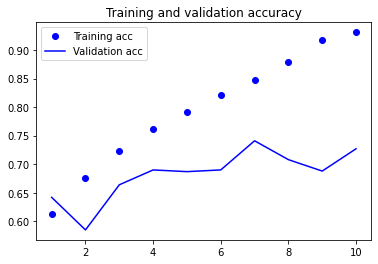

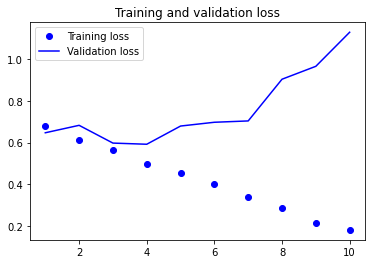

In [24]:
# 绘制出来训练过程中的损失曲线和精度曲线
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()